- 아무튼 하나의 단어로 일반화 시켜 문서 내 단어 수 줄이기


# 1. 표제어 추출(Lemmatizatin)

- 표제어(Lemma)는 한글로 '표제어', '기본 사전형 단어'
- 뿌리단어를 찾아 가는 과정 => am, are, is : be(표제어)
  
  
1. 어간(stem)
 - 단어의 의미를 담는 단어의 핵심 부분
2. 접사(affix)
 - 단어에 추가적인 의미 부여 부분
 
- 형태학적 파싱 : cats -> cat, -s

In [2]:
import nltk
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to C:\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.


True

In [3]:
from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']

print('표제어 추출 전 :',words)
print('표제어 추출 후 :',[lemmatizer.lemmatize(word) for word in words])

표제어 추출 전 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
표제어 추출 후 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'life', 'fly', 'dy', 'watched', 'ha', 'starting']


- 정확하지 않은 경우 : lemmatizer가 본래 단어의 품사를 알아야 정확한 결과 추출 가능

In [4]:
lemmatizer.lemmatize('dies', 'v')
lemmatizer.lemmatize('watched', 'v')
lemmatizer.lemmatize('has', 'v')

'have'

# 2. 어간 추출(Stemming)
- 섬세한 작업이 아님

In [5]:
# PoterStemmer 의 경우
from nltk.stem import PorterStemmer
from nltk.tokenize import word_tokenize

stemmer = PorterStemmer()

sentence = "This was not the map we found in Billy Bones's chest, but an accurate copy, complete in all things--names and heights and soundings--with the single exception of the red crosses and the written notes."
tokenized_sentence = word_tokenize(sentence)

print('어간 추출 전 :', tokenized_sentence)
print('어간 추출 후 :',[stemmer.stem(word) for word in tokenized_sentence])

어간 추출 전 : ['This', 'was', 'not', 'the', 'map', 'we', 'found', 'in', 'Billy', 'Bones', "'s", 'chest', ',', 'but', 'an', 'accurate', 'copy', ',', 'complete', 'in', 'all', 'things', '--', 'names', 'and', 'heights', 'and', 'soundings', '--', 'with', 'the', 'single', 'exception', 'of', 'the', 'red', 'crosses', 'and', 'the', 'written', 'notes', '.']
어간 추출 후 : ['thi', 'wa', 'not', 'the', 'map', 'we', 'found', 'in', 'billi', 'bone', "'s", 'chest', ',', 'but', 'an', 'accur', 'copi', ',', 'complet', 'in', 'all', 'thing', '--', 'name', 'and', 'height', 'and', 'sound', '--', 'with', 'the', 'singl', 'except', 'of', 'the', 'red', 'cross', 'and', 'the', 'written', 'note', '.']


규칙 기반의 접근을 하고 있으므로 어간 추출 후의 결과에는 사전에 없는 단어들도 포함되어 있습니다. 가령, 포터 알고리즘의 어간 추출은 이러한 규칙들을 가집니다.  
  
ALIZE → AL  
ANCE → 제거  
ICAL → IC  
  
위의 규칙에 따르면 좌측의 단어는 우측의 단어와 같은 결과를 얻게됩니다.  
  
formalize → formal    
allowance → allow  
electricical → electric  

In [6]:
words = ['formalize', 'allowance', 'electricical']

print('어간 추출 전 :',words)
print('어간 추출 후 :',[stemmer.stem(word) for word in words])

어간 추출 전 : ['formalize', 'allowance', 'electricical']
어간 추출 후 : ['formal', 'allow', 'electric']


In [7]:
# LancasterStemmer의 경우
from nltk.stem import PorterStemmer
from nltk.stem import LancasterStemmer

porter_stemmer = PorterStemmer()
lancaster_stemmer = LancasterStemmer()

words = ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
print('어간 추출 전 :', words)
print('포터 스테머의 어간 추출 후:',[porter_stemmer.stem(w) for w in words])
print('랭커스터 스테머의 어간 추출 후:',[lancaster_stemmer.stem(w) for w in words])

어간 추출 전 : ['policy', 'doing', 'organization', 'have', 'going', 'love', 'lives', 'fly', 'dies', 'watched', 'has', 'starting']
포터 스테머의 어간 추출 후: ['polici', 'do', 'organ', 'have', 'go', 'love', 'live', 'fli', 'die', 'watch', 'ha', 'start']
랭커스터 스테머의 어간 추출 후: ['policy', 'doing', 'org', 'hav', 'going', 'lov', 'liv', 'fly', 'die', 'watch', 'has', 'start']


차이점  
  
- Stemming  
am → am  
the going → the go  
having → hav    
    
    
- Lemmatization  
am → be  
the going → the going  
having → have  

# 3. 한국어에서의 어간 추출

5언 9품사  
  
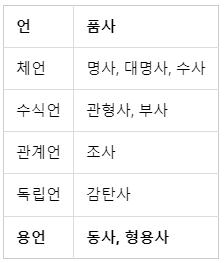  
   
용언의 '동사', '형용사'는 어간(stem)과 어미(ending)의 결합으로 구성 됨

1. 활용(Conjugation)
 - 한국어 말고 인도유럽어(indo-european language)에서도 볼수 있는 특징
 - 활용 : 용어의 어간이 어미를 가지는 일
    
    
- 어간(stem) : 용언(동사,형용사) 활용 시, 모양이 변하지 않는 부분, 활용에서 어미에 선행하는 부분, 가끔 어간의 모양도 바뀜(긋다, 긋고, 그어서, 그어라)
- 어미(ending) : 용언 어간 뒤에 붙어 활용하면서 변함, 여러 문법 기능 수행  
  
어간이 어미를 취할 때,   
어간의 모습이 일정하면 : 규칙 활용  
어간이나 어미의 모습이 변하면 : 불규칙 활용  

2. 규칙 활용 
 - 어간이 어미를 취할 때, 어간의 모습이 일정함 (잡/어간 + 다/어미)
 - 규칙 기반으로 어미를 단순히 분리해 어간 추출
  
  
3. 불규칙 활용
 - 어간이 어미를 취할 때, 어간의 모습이 변하거나, 어미가 특수한 어미인 경우 (듣-, 돕-, 곱-, 잇-, 오르-, 노랗-, ...)
 - (듣/들-, 돕/도우-, 곱/고우-, 잇/이-, 올/올-, 노랗/노라-')
 - (오르+ 아/어->올라, 하+아/어 -> 하여, 이르+아/어 -> 이르러, 푸르+아/어->푸르러)
 - 그지같다 